

# Project: Investigate a Dataset (No Show Appointments )

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

This dataset collects information
from 110k medical appointments in
Brazil and is focused on the question
of whether or not patients show up
for their appointment. A number of
characteristics about the patient are
included in each row, we will try in this anaylsis to know What are the factors that
important in order to
predict if a patient will
show up for their
scheduled
appointment?

In [1]:
# adding import statements for all of the packages in this notebook

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from datetime import datetime

<a id='wrangling'></a>
## Data Wrangling

>  In this section of the report, data will be loaded, checked for cleanliness, and then trimed and cleaned to be prepared for analysis.

### General Properties

In [2]:
# Loading the data and checking its content
# first thing to be cleaned are the names of the colums to lowercase them and fix minor mistakes -Handcap to Handicap, Hipertension to Hypertension-
df=pd.read_csv("noshowappointments.csv")
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [3]:
#using info function to inspect the data
#we can inspect that the ScheduledDay and AppointmentDay are set as object which need to be set to datetime
#also we can be certain that we have no null values in our dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [4]:
#checking for the number of duplicated values, and from this we can see we have no null or duplicated values
sum(df.duplicated())

0

In [5]:
#from here we can see some abnormalities with Age having min as -1 and max as 115, also the handcap range from 0 to 4
#which can be changed to 0 and 1 to represent having a handicap or not
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


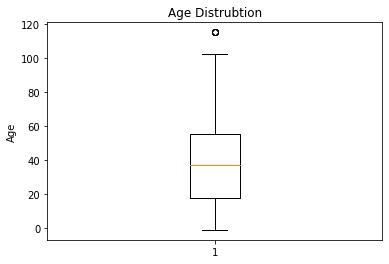

In [6]:
#from the below boxplot, we can see that -1 and 115 are considered as outliers which mostly between 0 and 102
#and could affect our data anaylsis,so they will be dropped
 
 

fig, ax = plt.subplots()
bp = ax.boxplot(df["Age"])
ax.set_title('Age Distrubtion')
ax.set_ylabel('Age')
plt.show()

In [7]:
#we can see here that there is no direct -positive or negative- correlation between the columns
df.corr()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
PatientId,1.000000,0.004039,-0.004139,-0.002880,-0.006441,0.001605,0.011011,-0.007916,-0.009749
AppointmentID,0.004039,1.000000,-0.019126,0.022615,0.012752,0.022628,0.032944,0.014106,-0.256618
Age,-0.004139,-0.019126,1.000000,-0.092457,0.504586,0.292391,0.095811,0.078033,0.012643
Scholarship,-0.002880,0.022615,-0.092457,1.000000,-0.019729,-0.024894,0.035022,-0.008586,0.001194
Hipertension,-0.006441,0.012752,0.504586,-0.019729,1.000000,0.433086,0.087971,0.080083,-0.006267
Diabetes,0.001605,0.022628,0.292391,-0.024894,0.433086,1.000000,0.018474,0.057530,-0.014550
Alcoholism,0.011011,0.032944,0.095811,0.035022,0.087971,0.018474,1.000000,0.004648,-0.026147
Handcap,-0.007916,0.014106,0.078033,-0.008586,0.080083,0.057530,0.004648,1.000000,-0.024161
SMS_received,-0.009749,-0.256618,0.012643,0.001194,-0.006267,-0.014550,-0.026147,-0.024161,1.000000


Text(0.5, 1.0, 'Age Distribution')

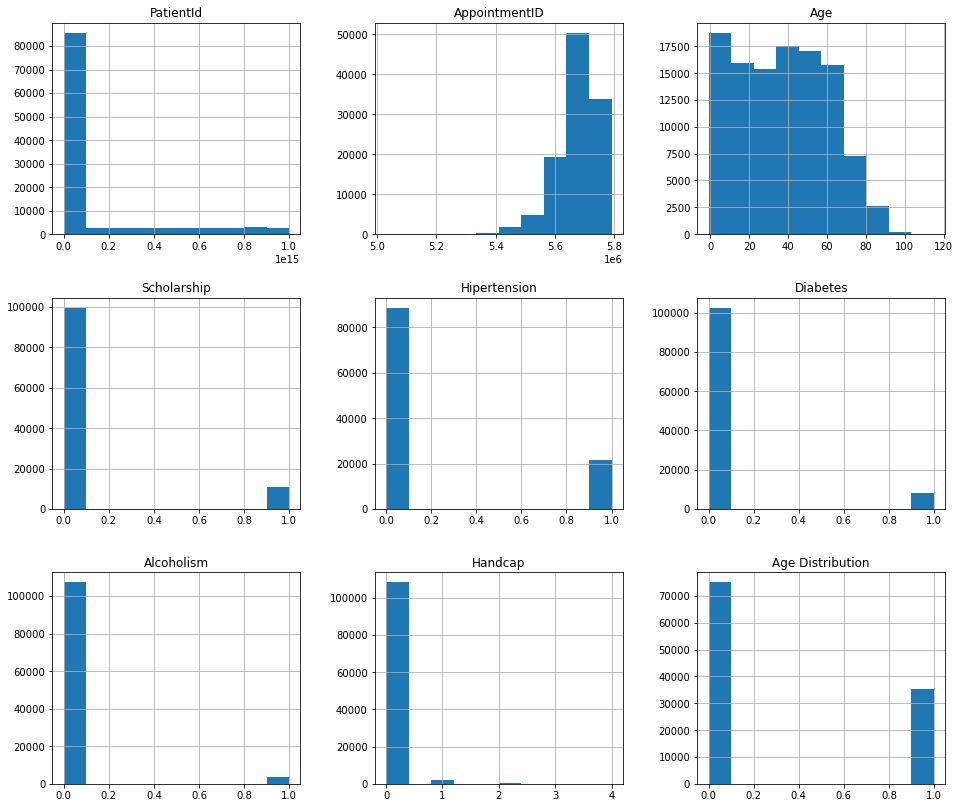

In [8]:
# from the below histgrams, we can see the followings:
#Age:we have alot of young patients(age 0,1) but the rest of the patients age 
#is distributed evenly with less patients older than 60 years.
#Alcoholism: Most of the patients are not alcoholics.
#Handicap: There are 4 handicap categories but most of the patients aren't handicapted
#Diabetes: Most of the patients don't have diabetes but it slightly more than alcoholics ratio and handicap.
#Scholarship:Most of the patients didn't receive Scholarship but it slightly more than alcoholics ratio and handicap

df.hist(figsize=(16,14));
plt.title('Age Distribution')

### Inital Observations:

- The dataset size is 14 columns by 110527 rows, there are neither null nor duplicated values
- All of the columns names need to be in lower case and to be corrected from slight mistakes
- Changing the columns type to correct type e.g. scheduled_day to datetime
- Age:we have alot of young patients(age 0,1) but the rest of the patients age is distributed evenly with less patients older than 60 years.
- Alcoholism: Most of the patients are not alcoholics.
- Handicap: There are 4 handicap categories but most of the patients aren't handicapted
- Diabetes: Most of the patients don't have diabetes but it slightly more than alcoholics ratio and handicap.
- Scholarship:Most of the patients didn't receive Scholarship but it slightly more than alcoholics ratio and handicap
- fixing age outliers (Age<0&>100) and changing handicap to bool

> In the next section, data will be cleaned as per the above observations to get it ready for anaylsis

### Data Cleaning phase

In [9]:
# Starting the cleaning phase with renaming the dataset columns

df_cleaned=df.rename(columns={"PatientId":"patient_id","AppointmentID":"appointment_id","Gender":"gender","ScheduledDay":"scheduled_day","AppointmentDay":"appointment_day","Age":"age","Neighbourhood":"neighbourhood","Scholarship":"scholarship","Hipertension":"hypertension","Diabetes":"diabetes","Alcoholism":"alcoholism","Handcap":"handicap","SMS_received":"sms_received","No-show":"no_show"
})
df_cleaned.head()

,patient_id,appointment_id,gender,scheduled_day,appointment_day,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,no_show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [10]:
# the next step will be to change scheduled_day and appointment_day to datetime, as it will make it easier to interact
#with days and hours and we can pin point the highest no-show day, hour
#to do this we have to convert them to the following format '%Y-%m-%dT%H:%M:%SZ'
df_cleaned["scheduled_day"]=pd.to_datetime(df_cleaned["scheduled_day"], format='%Y-%m-%dT%H:%M:%SZ')
df_cleaned["appointment_day"]=pd.to_datetime(df_cleaned["appointment_day"], format='%Y-%m-%dT%H:%M:%SZ')
df_cleaned.insert(4,"scheduled_hour",pd.to_datetime(df_cleaned["scheduled_day"].astype(str)).dt.hour)
 
df_cleaned.head()

,patient_id,appointment_id,gender,scheduled_day,scheduled_hour,appointment_day,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,no_show
0,2.987250e+13,5642903,F,2016-04-29 18:38:08,18,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29 16:08:27,16,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29 16:19:04,16,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29 17:29:31,17,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29 16:07:23,16,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [11]:
df_cleaned.drop(list(df_cleaned.index[df_cleaned["age"] > 102])+list(df_cleaned.index[df_cleaned["age"] < 1]), inplace=True)


In [12]:
#checking the values before changing it to bool to make sure all the data is transferred correctly
df_cleaned["handicap"].value_counts()

0    104746
1      2037
2       183
3        13
4         3
Name: handicap, dtype: int64

In [13]:
#changing handicap to boolean will make it easier to detect its effect on the no-show
df_cleaned["handicap"] = df_cleaned["handicap"].astype('bool')

In [14]:
df_cleaned["handicap"].value_counts()

False    104746
True       2236
Name: handicap, dtype: int64

In [15]:
#checking the values before changing it to bool to make sure all the data is transferred correctly
df_cleaned["no_show"].value_counts()

No     85305
Yes    21677
Name: no_show, dtype: int64

In [16]:
#changing no_show to boolean will make it easier to work with
df_cleaned["no_show"].replace({'No': 0, 'Yes': 1}, inplace = True)

df_cleaned["no_show"] = df_cleaned["no_show"].astype('bool')

In [17]:
df_cleaned["no_show"].value_counts()

False    85305
True     21677
Name: no_show, dtype: int64



> with this cleaning is completed, In the next section, data set will be analyzed to discover the patterns behind the no-show problem

<a id='eda'></a>
## Exploratory Data Analysis

>  Now that the data is cleaned, it is ready for exploration. if we looked at the different columns, we can see 3 categories 
- 1-Demographics Features(Gender,Age,Neighoburhood)
- 2-Dieases / chronic or harmful Personal Features
- 3-Season / time Feature


Any of the above features could have affected the missed appointments ratio
For example, a certain hour/day of the week or certain location might be the reason, in the following section we will explore all of these questions. but before that, lets first find the total number of the missed appointments



In [18]:
#I also find taking a copy the data into a new variable after every step for safekeeping just incase
#a mistake happened and we wanted to return to the cleaned version
df_ready=df_cleaned
df_ready.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 106982 entries, 0 to 110526
Data columns (total 15 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   patient_id       106982 non-null  float64       
 1   appointment_id   106982 non-null  int64         
 2   gender           106982 non-null  object        
 3   scheduled_day    106982 non-null  datetime64[ns]
 4   scheduled_hour   106982 non-null  int64         
 5   appointment_day  106982 non-null  datetime64[ns]
 6   age              106982 non-null  int64         
 7   neighbourhood    106982 non-null  object        
 8   scholarship      106982 non-null  int64         
 9   hypertension     106982 non-null  int64         
 10  diabetes         106982 non-null  int64         
 11  alcoholism       106982 non-null  int64         
 12  handicap         106982 non-null  bool          
 13  sms_received     106982 non-null  int64         
 14  no_show          106

The number of missed appointmentsis 21677


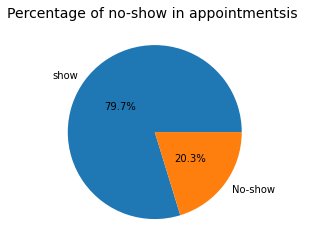

In [19]:
#from the below pie chart, we can see that 20% of the appointments are missed
print("The number of missed appointmentsis {}".format(df_ready.query("no_show==1")["no_show"].sum()))
labels=["show","No-show"]
plt.pie(df_ready["no_show"].value_counts(),autopct='%.1f%%',labels=labels, pctdistance=0.5)
plt.title("Percentage of no-show in appointmentsis ", fontsize=14);
plt.show()

From the above pie chart, we can see that 20% of the appointments are missed


### Research Question 1 (Demographics Features effect) (Does Age, Gender and neighbourhood affect the no-show ratio)

The number of the females whom missed appointments is [14272]


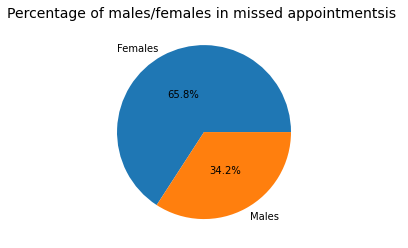

In [20]:
# lets calculate the percentage of males to females
#from the below pie, we can see that, out of the 22K, around 14.5 are females and the rest are males
df_gender=df_ready.query("no_show==1")["gender"] .value_counts()
print("The number of the females whom missed appointments is {}".format(df_ready.query("no_show==1&gender=='F'")["gender"] .value_counts().values))
#from the below pie chart, we can see that 20% of the appointments are missed
labels=["Females","Males"]
plt.pie(df_gender,autopct='%.1f%%',labels=labels, pctdistance=0.5)
plt.title("Percentage of males/females in missed appointmentsis ", fontsize=14);
plt.show()


From the above pie chart, we can see that, out of the 22K, around 14.5 are females and the rest are males

In [27]:
# since we will create alot of bar plots to visualize our data, it is best practice to create a custom function
#to avoid repeating code every time

def myBarPlot(df,Xvar,Xvalue="",normalize=False):
    #calling plot function
    df[Xvar].value_counts(normalize=normalize).plot.bar(edgecolor="blue",figsize=[26,6],width=0.7);
    #adding x axis title 
    if(Xvar=="no_show"):
        Xvar=Xvalue
        
    plt.xlabel(Xvar.title(),fontsize=10,weight="bold")
   
    #adding y axis title  
    plt.ylabel("Frequency".title(),fontsize=10,weight="bold")
    #adding plot title 
    plt.title(f"Distribution of {Xvar}".title(),fontsize=14,weight="bold")
    plt.legend();


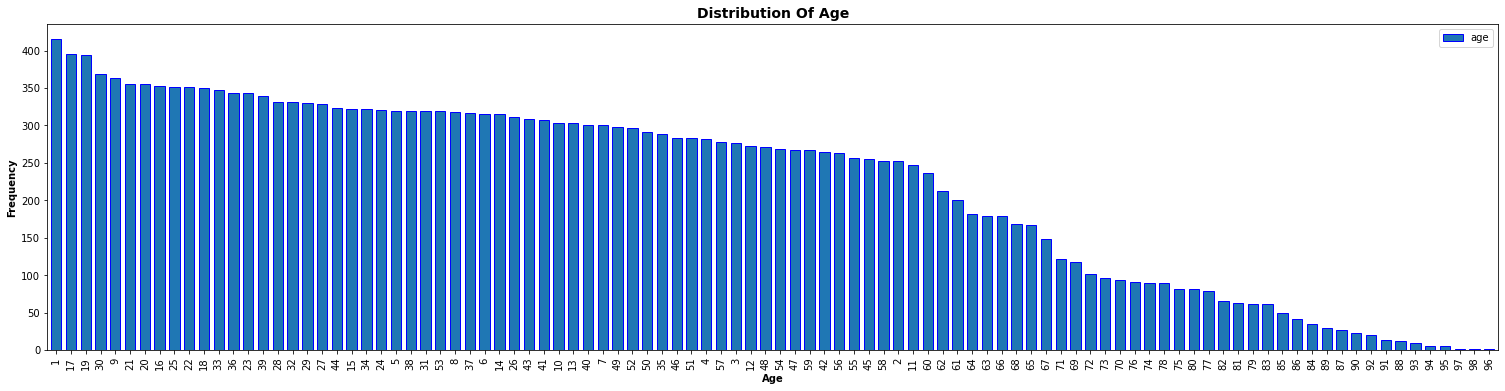

In [28]:
# lets check our patients by age 
# we can see from the below bar chart that there is a huge peak in the infants(0-1 years) and as the age goes up 
#the ratio decrease till it make left skewed plot



#calling our custom function to plot the bar plot
myBarPlot(df_ready.query("no_show==1"),"age")
 
 

we can see from the above bar chart that there is a huge peak in the infants(0-1 years) and as the age goes up 
the ratio decrease till it make left skewed plot

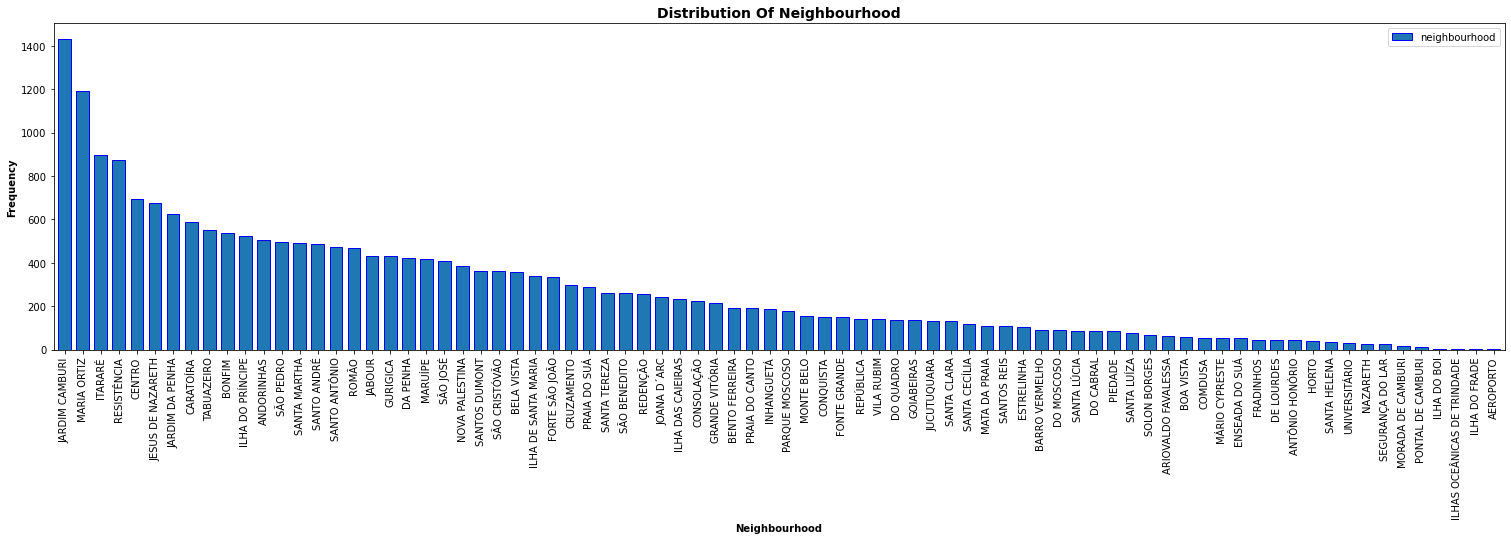

In [23]:
# lets check our patients by neighbourhood 
# we can see from the below bar chart that there is a huge peak in JARDIM CAMBURI and MARIA ORTIZ 
#the ratio decrease till it make right skewed plot

 
#calling our custom function to plot the bar plot
myBarPlot(df_ready.query("no_show==1"),"neighbourhood")

we can see from the below bar chart that there is a huge peak in JARDIM CAMBURI and MARIA ORTIZ 
the ratio decrease till it make right skewed plot

### Research Question 2  (Season/Time effect) (Is the time of the appointments can affect the no_show ratio)

#### We can see that most of the dataset occured during May 2016, so we won't be able to judge season effect on the data set, instead the time of appointments will be inspected

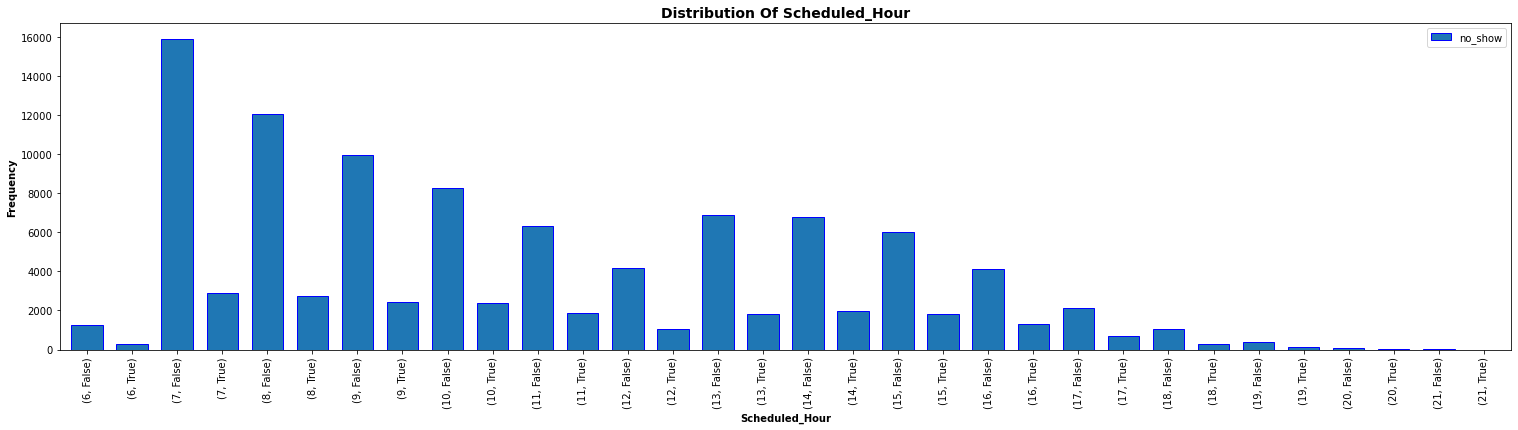

In [24]:
# lets take a look at time of the appointments and see if it will affect the ratio
# we can see from the below bar chart that, in the early morning the number of no-show is higher (7-10 am)
# it decrease a bit in mid day then raise again (13:00-14:00) and fall back down


#calling our custom function to plot the bar plot
myBarPlot(df_ready.groupby(["scheduled_hour"]),"no_show","scheduled_hour")

#### We can see from the below bar chart that, in the early morning the number of no-show is higher (7-10 am), it decrease a bit in mid day then raise again (13:00-14:00) and fall back down. so this could indicte that maybe we can add more staff in morning shift or make the clinic work longer hour since it closes down at 9 pm as there is no data after that

### Research Question 3 (Dieases/Chronic effect)  (does having a chronic disease factor in showing up)

#### In this section, we will check the effect of Dieases/Chronic illness on the no-show ratio

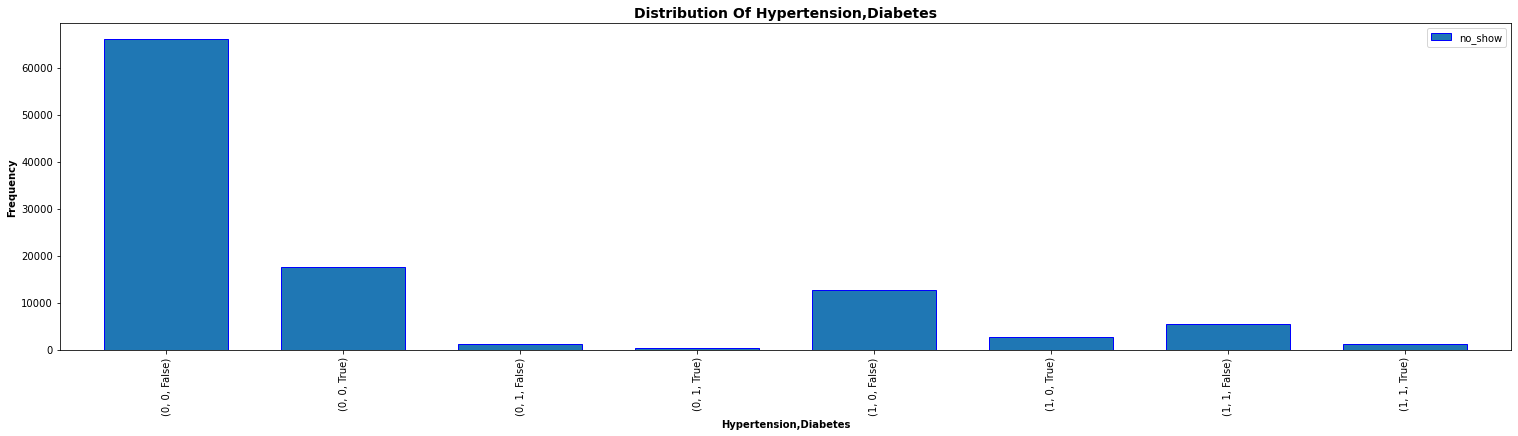

In [25]:
# lets take a look at chronic diseases columns (hypertension, diabetes) and see if it will affect the ratio
#from the below graph, we can see that either the patient has chronic disease or not, 80% will go to the appointments

 
#calling our custom function to plot the bar plot
myBarPlot(df_ready.groupby(["hypertension","diabetes"]),"no_show","hypertension,diabetes")

#### From the above graph, we can see that either the patient has chronic disease or not, 80% will go to the appointments

In [26]:
#after finishing our analysis, we will save the data frame in a new csv
df_ready.to_csv("no_show_cleaned.csv")

<a id='conclusions'></a>
## Conclusions

After cleaning and doing data exploratory analysis, I can list the most important finding as below: 

- Out off 110K only 22K didn’t show up in the period from 29-4-16 till 8-6-16
- out of the 22K, 14.5k are females and 7.7K are males (as seen in pie chart)
- The columns -Features- can be divided into 3 section (Demographics Features, alignment Personal Features and Season / time Feature )
- Most of the patients aren't alcoholics. (Only 3% are alcoholics)
- Most of the patients doesn't have handicap. (Only 2% suffer from handicap)
- The younger the age, the higher the ratio of no-show but it gets uniformed as the age goes up
- Either the patient has chronic disease or not, 80% will go to the appointments
- Some neighborhoods are higher than other like JARDIM CAMBURI (Bar chart)
- If we looked at the time of the missed Appointments, will find that most of them was in the early morning (7 am to 11 am) (bar chart) -To help in this issue, maybe we can add more staff in morning shift or make the clinic work longer hour-

> Limitations:
>
>- The dataset duration (2 months) which is too small to get any conclusive and accurate data from, also any model built from this set won’t have high accuracy
>- Appointment time wasn't given, which could add more insights to the dataset
>- This dataset only covers Vitória, not all of Brazil. Covering more than one state in Brazil would've been better.
>- Also, the data is too old -4 years old-, maybe adding more data for the following years, could help to shed some light in understanding the elements which affect the missed Appointments
>- The handicap category wasn't clear in the dataset, had to look for it in the discussions
https://www.kaggle.com/joniarroba/noshowappointments/discussion/32174
>- Looking over the dates, most of the missed Appointments are in certain days in May 2016, during this month there were many political events like the president impeachment (which may have impacted the no-show ratio)
 https://en.wikipedia.org/wiki/2016_in_Brazil#May


